<a href="https://colab.research.google.com/github/ParkEunHyeok/MachineLearningExamples/blob/main/Multiple_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Iris(붓꽃) 분류, 다중 분류 사용
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
data = files.upload() # iris csv 파일 업로드

Saving 10-2,3_Iris_Dataset.csv to 10-2,3_Iris_Dataset.csv


In [50]:
data = pd.read_csv(r'10-2,3_Iris_Dataset.csv')
df = pd.DataFrame(data)
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          NaN           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [51]:
df.isnull().sum() # sepal.width에서 결측치가 1개 있음을 알 수 있음.

sepal.length    0
sepal.width     1
petal.length    0
petal.width     0
variety         0
dtype: int64

In [54]:
df = df.fillna(df['sepal.width'].mean()) # 결측치를 그 행의 평균값으로 대체
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1     3.500000           1.4          0.2     Setosa
1             4.9     3.057718           1.4          0.2     Setosa
2             4.7     3.200000           1.3          0.2     Setosa
3             4.6     3.100000           1.5          0.2     Setosa
4             5.0     3.600000           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7     3.000000           5.2          2.3  Virginica
146           6.3     2.500000           5.0          1.9  Virginica
147           6.5     3.000000           5.2          2.0  Virginica
148           6.2     3.400000           5.4          2.3  Virginica
149           5.9     3.000000           5.1          1.8  Virginica

[150 rows x 5 columns]


In [55]:
df.corr() # 데이터들간의 상관관계 분석
# petal.length와 petal.width가 서로 강한 양의 상관관게를 가짐을 알 수 있음.

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.118589,0.871754,0.817941
sepal.width,-0.118589,1.000000,-0.429652,-0.367313
petal.length,0.871754,-0.429652,1.000000,0.962865
petal.width,0.817941,-0.367313,0.962865,1.000000


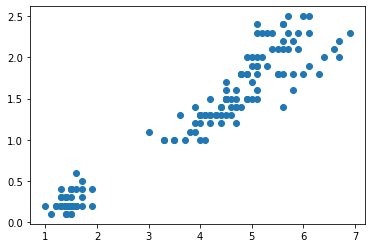

In [56]:
scatter = plt.scatter(df['petal.length'], df['petal.width'], label = 'A')
plt.show()
# 데이터를 scatter 그래프로 시각화, 선형성을 띄고 있음을 알 수 있음. (=데이터의 특징이 명확하다.)

In [57]:
le = LabelEncoder()
result = le.fit_transform(df['variety'])  # variety행을 라벨 인코딩 해줌.
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [67]:
Y = df["variety"] # 종속변수 설정
X = df[["sepal.length","sepal.width","petal.length","petal.width"]] # 설명변수 설정

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state = 0) # 자료를 train set(0.7)과 test set(0.3)을 나눔

log_clf = LogisticRegression() # log_cif에 logistic regression 입력
log_clf.fit(X_train, Y_train) # train set 을 이용하여 만들 모델 생성
print("예측률 : ", log_clf.score(X_test, Y_test)) # test set 을 사용하여 예측한 예측율

예측률 :  1.0
